In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')

resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
resenha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [4]:
print("Negativa: \n")

resenha.loc[0, 'text_pt']

Negativa: 



'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [5]:
print("Positiva: \n")

resenha.loc[49002, 'text_pt']

Positiva: 



'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

In [6]:
resenha['sentiment'].value_counts(normalize=True) * 100

neg    50.071777
pos    49.928223
Name: sentiment, dtype: float64

A base de dados se encontra balanceada

In [7]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])

resenha['classificacao'] = classificacao

resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
texto = ['Assisti um filme bom', 'Assisti um filme ruim']

vectorizer = CountVectorizer(lowercase=False)

bag_of_words = vectorizer.fit_transform(texto)

In [10]:
vectorizer.get_feature_names_out()

array(['Assisti', 'bom', 'filme', 'ruim', 'um'], dtype=object)

In [11]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [12]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())

matriz_esparsa

,Assisti,bom,filme,ruim,um
0,1,1,1,0,1
1,1,0,1,1,1


In [13]:
vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(resenha['text_pt'])

In [14]:
bag_of_words.shape

(49459, 156923)

Grande e computacionalmente custoso/ineficiente

In [15]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(resenha['text_pt'])

In [16]:
bag_of_words.shape

(49459, 50)

In [17]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              resenha['classificacao'], 
                                                              random_state=42)

In [18]:
regressao_logistica = LogisticRegression()

In [19]:
regressao_logistica.fit(treino, classe_treino)

LogisticRegression()

In [20]:
regressao_logistica.score(teste, classe_teste)

0.6583097452486858

In [21]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(
        bag_of_words, 
        texto[coluna_classificacao], 
        random_state=42
    )
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)
    
    return acuracia

In [22]:
classificar_texto(resenha, "text_pt", "classificacao")

0.6583097452486858

In [23]:
bag_of_words.sum(axis=0)

matrix([[ 53719,  25563,  22150,  39511,  99840,  79061,  62047, 418565,
         101912,  41270,  22721,  50815,  28163, 133351,  24325,  21863,
          36162,  28385,  69975, 152842,  32150,  43071,  23599,  43923,
          56113,  66262,  21601,  53924,  44358,  57381, 131507,  74467,
          32903, 127115,  61672,  23224, 330177,  24146,  79844,  34046,
          40546,  28875,  36803,  34988,  20858,  25396,  24939, 217830,
         131190,  51010]], dtype=int64)

In [24]:
vectorizer.get_feature_names_out()

array(['Eu', 'ao', 'apenas', 'as', 'com', 'como', 'da', 'de', 'do', 'dos',
       'ela', 'ele', 'eles', 'em', 'era', 'esse', 'este', 'está', 'eu',
       'filme', 'filmes', 'foi', 'história', 'isso', 'mais', 'mas', 'me',
       'muito', 'na', 'no', 'não', 'os', 'ou', 'para', 'por', 'quando',
       'que', 'realmente', 'se', 'ser', 'seu', 'sobre', 'sua', 'são',
       'também', 'tem', 'tão', 'um', 'uma', 'você'], dtype=object)

In [25]:
from wordcloud import WordCloud

In [26]:
todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

len(todas_palavras)

63448424

In [27]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

In [28]:
import matplotlib.pyplot as plt

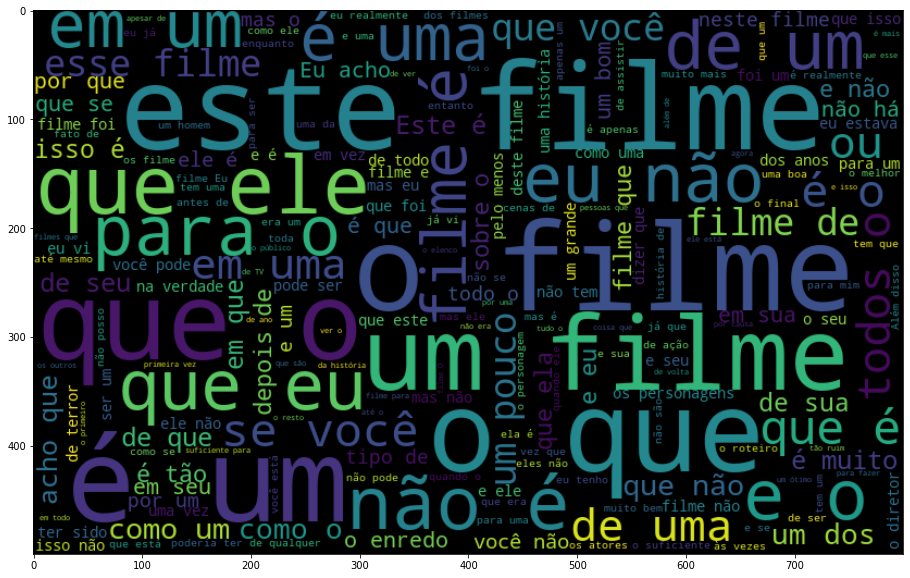

In [29]:
plt.figure(figsize=(18, 10))

plt.imshow(nuvem_palavras, interpolation='bilinear')

plt.show()

In [30]:
import nltk
from nltk import tokenize

In [31]:
frase = "Bem vindo ao mundo do PLN"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

In [32]:
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [33]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [34]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})

In [35]:
df_frequencia.sort_values(by='Frequência', ascending=False)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
...,...,...
202546,Delvian;,1
202548,Henson;,1
202549,FarScape,1
49483,Ghencea.,1


In [36]:
import seaborn as sns

In [37]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

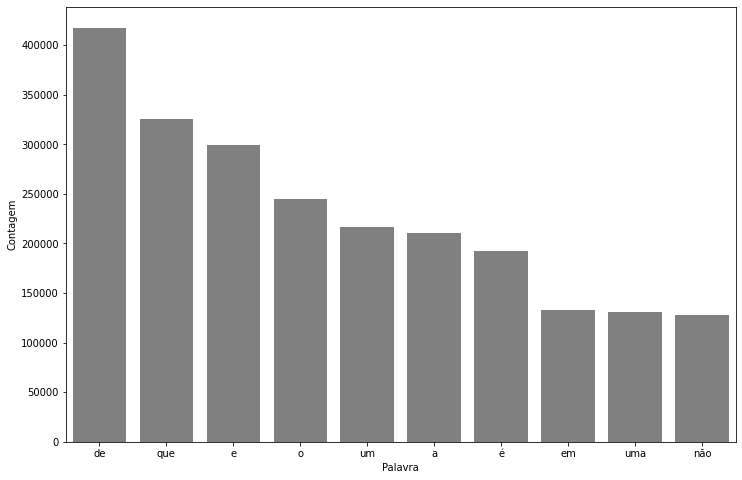

In [38]:
pareto(resenha, "text_pt", 10)

In [39]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

In [40]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [41]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6811160533764659

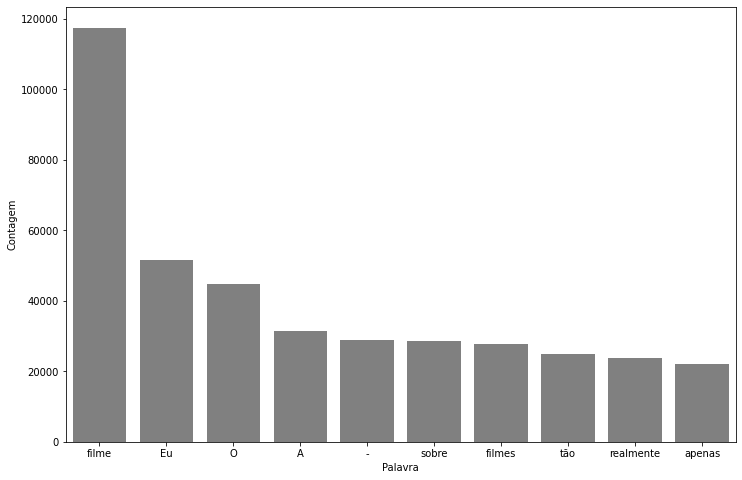

In [42]:
pareto(resenha,"tratamento_1", 10)

In [43]:
from string import punctuation

In [44]:
pontuacao = list(punctuation)

pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [45]:
palavras_irrelevantes = palavras_irrelevantes + pontuacao

In [46]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [47]:
frase_processada = []

for opiniao in resenha['tratamento_1']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))

In [48]:
resenha['tratamento_2'] = frase_processada

In [49]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


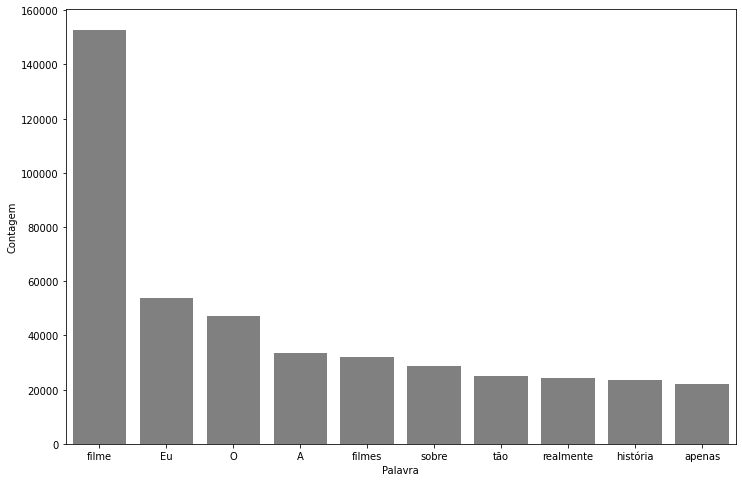

In [50]:
pareto(resenha, 'tratamento_2', 10)

In [51]:
import unidecode

In [52]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [53]:
palavras_irrelevantes_sem_acento = [unidecode.unidecode(palavra) for palavra in palavras_irrelevantes]

In [54]:
resenha['tratamento_3'] = sem_acentos

In [55]:
frase_processada = []

for opiniao in resenha['tratamento_3']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes_sem_acento:
            nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_3'] = frase_processada

In [56]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [57]:
classificar_texto(resenha, 'tratamento_3', 'classificacao')

0.6887990295188031

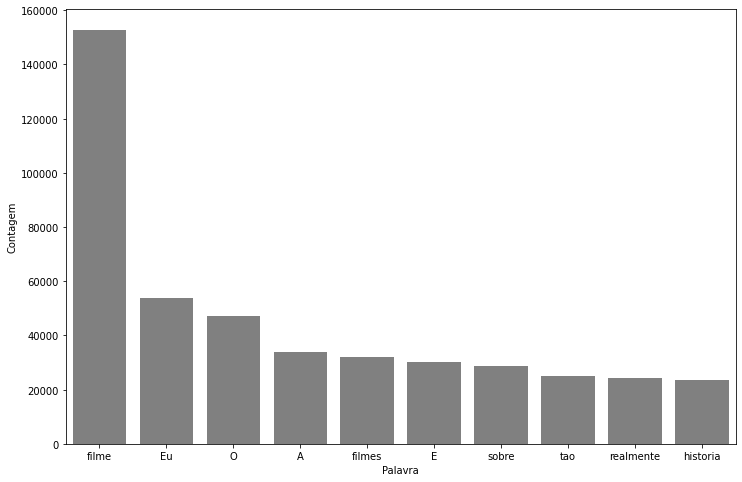

In [58]:
pareto(resenha, 'tratamento_3', 10)

In [59]:
frase_processada = []

for opiniao in resenha['tratamento_3']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra.lower() not in palavras_irrelevantes_sem_acento:
            nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_4'] = frase_processada

In [60]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez Sr Costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos Gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,Beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [61]:
classificar_texto(resenha, 'tratamento_4', 'classificacao')

0.6881520420541852

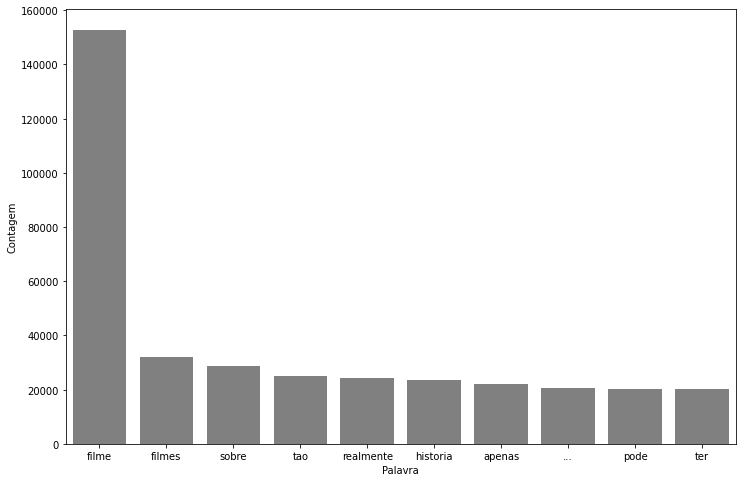

In [62]:
pareto(resenha, 'tratamento_4', 10)

In [63]:
stemmer = nltk.RSLPStemmer()

In [64]:
stemmer.stem("filme")

'film'

In [65]:
stemmer.stem("filmes")

'film'

In [66]:
stemmer.stem("filmagem")

'film'

In [67]:
frase_processada = []

for opiniao in resenha['tratamento_4']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
            
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_5'] = frase_processada

In [68]:
classificar_texto(resenha, 'tratamento_5', 'classificacao')

0.6954306510311363

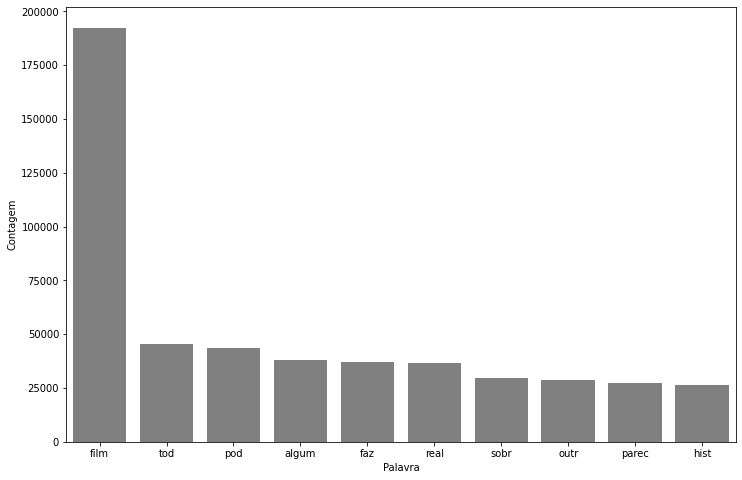

In [69]:
pareto(resenha, 'tratamento_5', 10)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [73]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica.fit(treino, classe_treino)

LogisticRegression()

In [74]:
regressao_logistica.score(teste, classe_teste)

0.6600889607763849

In [75]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica.fit(treino, classe_treino)

LogisticRegression()

In [76]:
regressao_logistica.score(teste, classe_teste)

0.6963202587949858

In [78]:
from nltk import ngrams

In [87]:
frase = "Assisti um ótimo filme."

In [88]:
frase_separada = token_pontuacao.tokenize(frase)

frase_separada

['Assisti', 'um', 'ótimo', 'filme', '.']

In [89]:
pares = ngrams(frase_separada, 2)

list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme'), ('filme', '.')]

In [90]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

In [91]:
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica.fit(treino, classe_treino)

LogisticRegression()

In [92]:
regressao_logistica.score(teste, classe_teste)

0.8856449656287909

In [93]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf.get_feature_names_out()
)

In [94]:
pesos.nlargest(10, 0)

,0
otim,9.905867
excel,9.008891
perfeit,6.899352
maravilh,6.287759
favorit,5.890861
incri,5.762412
divert,5.386778
brilh,4.857927
ador,4.575874
hoj,4.492856


In [95]:
pesos.nsmallest(10, 0)

,0
ruim,-11.783097
pi,-11.462572
horri,-9.725881
terri,-8.404175
nad,-7.623792
chat,-7.517420
parec,-6.881815
nenhum,-6.380789
tent,-5.955771
mal,-5.712541
